<a href="https://colab.research.google.com/github/schen8180/sophiac.github.io/blob/gh-pages/Sophia_Chen_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import KFold
from sklearn.svm import SVR

In [3]:
!pip install pyswarms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pyswarms as ps

In [5]:
!pip install geneticalgorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from geneticalgorithm import geneticalgorithm as ga

In [7]:
air_data = pd.read_csv('drive/MyDrive/Examples 310/AirI.csv')

In [8]:
air_data
Df = air_data

In [9]:
Df

,3.4482,0.0013136,0.15747,0.6883,0.15292,0,0.1,0.096603,0.52135,0.38205,...,-2.9459,0.21996,-0.69045,0.24044,-0.25864,1.3387,0.11482,-0.43046,0.82309,1.5435
0,3.3019,0.188490,0.553190,0.258290,0.000031,0.000000,0.00000,0.039008,0.43211,0.527160,...,-0.22680,-0.428570,0.74992,-0.111920,1.583000,0.88565,-0.053227,0.67796,-1.72010,-0.550510
1,2.2894,0.052169,0.438520,0.494030,0.015282,0.000000,0.00000,0.000000,0.00000,0.394840,...,1.15790,0.010118,0.73593,1.356000,0.057821,-1.44140,1.581800,1.25420,1.02540,-1.018900
2,2.6207,0.000000,0.000000,0.004213,0.109340,0.493440,0.39300,0.000000,0.00000,0.578540,...,-0.69767,1.577800,0.54899,-0.780420,1.136700,-0.84240,0.993120,-0.44576,-0.78778,-1.490900
3,2.8439,0.000000,0.000000,0.019504,0.260470,0.549860,0.17016,0.010568,0.30520,0.670460,...,-1.49170,-0.688640,-0.69924,0.360740,-0.685860,-0.76161,-0.354560,0.83093,-0.27100,0.388610
4,2.6684,0.331420,0.518940,0.147120,0.000000,0.000000,0.00000,0.000000,0.00000,0.244070,...,-0.35923,-0.029500,0.54853,1.929200,1.063400,1.82900,0.142320,-0.46403,-2.18420,-1.967500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2.4101,0.301000,0.021904,0.000415,0.000000,0.000000,0.00000,0.000000,0.00000,0.051206,...,-1.56660,-1.097100,2.77450,0.679850,-0.292200,0.13691,-0.439250,-1.56390,0.29082,0.023485
106,3.1072,0.000734,0.138890,0.688740,0.171630,0.000000,0.00000,0.171260,0.54746,0.280340,...,-0.32440,-1.341500,-1.51650,0.870840,1.023700,0.26581,0.174520,-0.29601,1.13600,0.217580
107,2.4101,0.001095,0.151180,0.688720,0.159000,0.000000,0.00000,0.000000,0.00000,0.194760,...,-0.49572,-0.832130,0.52386,0.189400,1.115700,-0.14259,-0.481300,-1.58790,-0.23976,1.717000
108,2.6207,0.117370,0.526200,0.354590,0.001831,0.000000,0.00000,0.039008,0.43211,0.527160,...,-0.87353,0.063740,0.20128,0.090828,0.338310,-1.23960,-1.197600,-0.35008,0.59517,0.803430


In [10]:
y = Df.iloc[:,0].values
x = Df.drop('3.4482', axis = 1).values

In [11]:
x

array([[ 1.8849e-01,  5.5319e-01,  2.5829e-01, ...,  6.7796e-01,
        -1.7201e+00, -5.5051e-01],
       [ 5.2169e-02,  4.3852e-01,  4.9403e-01, ...,  1.2542e+00,
         1.0254e+00, -1.0189e+00],
       [ 0.0000e+00,  0.0000e+00,  4.2128e-03, ..., -4.4576e-01,
        -7.8778e-01, -1.4909e+00],
       ...,
       [ 1.0952e-03,  1.5118e-01,  6.8872e-01, ..., -1.5879e+00,
        -2.3976e-01,  1.7170e+00],
       [ 1.1737e-01,  5.2620e-01,  3.5459e-01, ..., -3.5008e-01,
         5.9517e-01,  8.0343e-01],
       [ 0.0000e+00,  2.0058e-02,  5.3858e-01, ..., -1.1643e+00,
        -4.9661e-01,  5.0338e-01]])

In [12]:
kf = KFold(n_splits = 10, shuffle = True, random_state=123)

In [13]:
scale = StandardScaler()

#### ElasticNet

Objective function for Particle Swarm Optimization 

In [14]:
#applying pso 
def objective_pso(h):
  output = []
  for i in range(h.shape[0]):
    a = h[i,0]
    l = h[i,1]
    model = ElasticNet(alpha=a,l1_ratio=l,max_iter=5000)
    PE = []
    for idxtrain, idxtest in kf.split(x):
      xtrain = x[idxtrain]
      ytrain = y[idxtrain]
      xtrain = scale.fit_transform(xtrain)
      xtest = x[idxtest]
      ytest = y[idxtest]
      xtest = scale.transform(xtest)
      model.fit(xtrain,ytrain)
      PE.append(MSE(ytest,model.predict(xtest)))
    output.append(np.mean(PE))
  return output

In [15]:
#boundaries for pso
max = np.array([2,1])
min = np.array([0,0])
bounds = (min, max)
options = {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
optimizer = ps.single.GlobalBestPSO(n_particles=40, dimensions=2, options=options, bounds=bounds)
cost, pos = optimizer.optimize(objective_pso, iters=100)

2022-08-01 01:34:32,564 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.269
2022-08-01 01:39:01,671 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.26923488186693595, best pos: [0.33988461 0.163349  ]


Objective functions for Simulated Annealing and Genetic Algorithm


In [34]:
#this is for simulated annealing and GA:
def objective(h):
  a = h[0]
  l = h[1]
  model = ElasticNet(alpha = a, l1_ratio=l,max_iter=50000)
  PE = []
  for idxtrain, idxtest in kf.split(x):
      xtrain = x[idxtrain]
      ytrain = y[idxtrain]
      xtrain = scale.fit_transform(xtrain)
      xtest = x[idxtest]
      ytest = y[idxtest]
      xtest = scale.transform(xtest)
      model.fit(xtrain,ytrain)
      PE.append(MSE(ytest,model.predict(xtest)))
  return np.mean(PE)

 The best solution found:
 [0.34833908 0.16144789]

 Objective function:
 0.2692537331281054


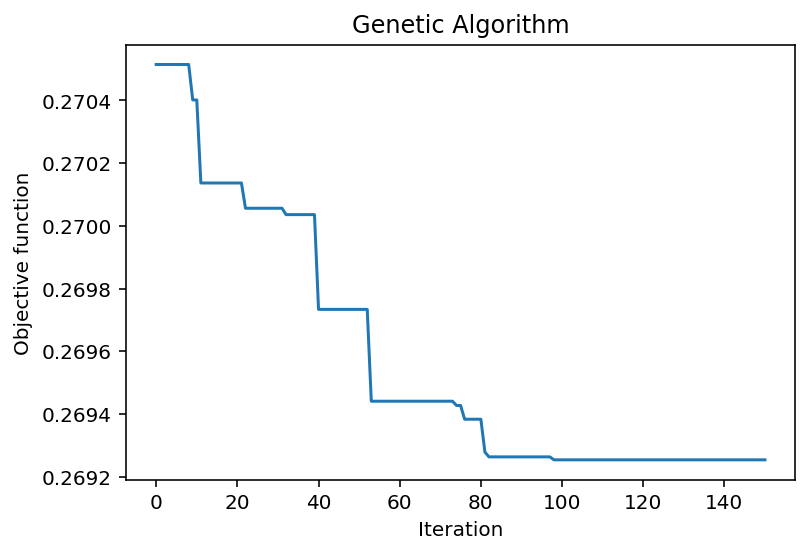

In [35]:
#adjusting bounds for ga
varbound=np.array([[0,2],[0,1]])

model=ga(function=objective,dimension=2,variable_type='real',variable_boundaries=varbound)

model.run()

In [36]:
#adjusting bounds for simulated annealing 
from scipy.optimize import dual_annealing

In [39]:
lb = [0.0001,0.0001]
ub = [2,1]
ret = dual_annealing(objective, bounds=list(zip(lb, ub)),maxiter=10000,maxfun=10000)


In [40]:
ret.x #gives best alpha and l1 ratio 

array([0.33961504, 0.1633908 ])

In [41]:
ret #to find the best cost value 

     fun: 0.26923494380999796
 message: ['Maximum number of function call reached during annealing']
    nfev: 10000
    nhev: 0
     nit: 2263
    njev: 314
  status: 0
 success: False
       x: array([0.33961504, 0.1633908 ])

The best cost value for ElasticNet from using the objective functions for Particle Swarm Optimization, Genetic Algorithm, and Simulated Annealing is 0.269. The best Alpha value is 0.340 and L1 Ratio is 0.163. 

#### Support Vector Regression

Objective function for Particle Swarm Optimization

In [30]:
#for support vector regressions 
#this is the techinical format if you want to apply PSO
def objective_pso(h): #h stands for hyperparameters
  output = []
  for i in range(h.shape[0]):
    e = h[i,0]
    C = h[i,1]
    model = SVR(kernel='linear', epsilon=e,C=C)
    PE = []
    for idxtrain, idxtest in kf.split(x):
      xtrain = x[idxtrain]
      ytrain = y[idxtrain]
      xtrain = scale.fit_transform(xtrain)
      xtest = x[idxtest]
      ytest = y[idxtest]
      xtest = scale.transform(xtest)
      model.fit(xtrain,ytrain)
      PE.append(MSE(ytest,model.predict(xtest)))
    output.append(np.mean(PE))
  return output

In [32]:
#adjusting boundaries for pso
max = np.array([1,2])
min = np.array([0,0])
bounds = (min, max)
options = {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options, bounds=bounds)
cost, pos = optimizer.optimize(objective_pso, iters=100)

2022-08-01 02:21:43,795 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.288
2022-08-01 02:26:02,002 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.2878398846015823, best pos: [0.14907082 1.0508861 ]


Objective function for Simulated Annealing and Genetic Algorithm 

In [20]:
#this is for simulated annealing and GA:
def objective(h):
  e = h[0]
  C = h[1]
  model = SVR(kernel='linear', epsilon=e,C=C)
  PE = []
  for idxtrain, idxtest in kf.split(x):
      xtrain = x[idxtrain]
      ytrain = y[idxtrain]
      xtrain = scale.fit_transform(xtrain)
      xtest = x[idxtest]
      ytest = y[idxtest]
      xtest = scale.transform(xtest)
      model.fit(xtrain,ytrain)
      PE.append(MSE(ytest,model.predict(xtest)))
  return np.mean(PE)

 The best solution found:
 [0.1569415  1.13812634]

 Objective function:
 0.28786118472263345


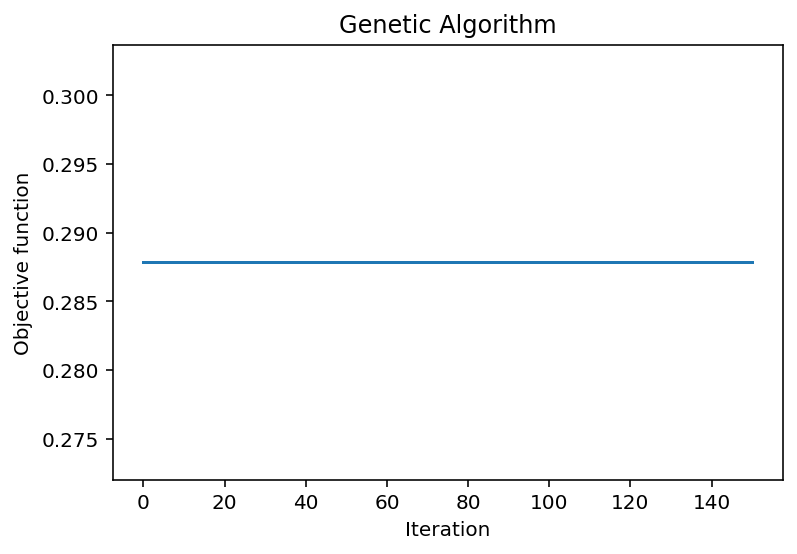

In [22]:
ga_bound=np.array([[0,1],[0,2]])

model=ga(function=objective,dimension=2,variable_type='real',variable_boundaries=ga_bound)

model.run()

In [23]:
## this is for simulated annealing 
from scipy.optimize import dual_annealing

In [25]:
#setting boundaries for dual annealing
lb = [0.0001,0.0001]
ub = [1,2]
ret = dual_annealing(objective, bounds=list(zip(lb, ub)),maxiter=10000,maxfun=10000)


In [26]:
ret.x #gives epsilon and C val

array([0.14907387, 1.70834864])

In [27]:
ret 

     fun: 0.28784371525300906
 message: ['Maximum number of function call reached during dual annealing']
    nfev: 10062
    nhev: 0
     nit: 1851
    njev: 884
  status: 0
 success: False
       x: array([0.14907387, 1.70834864])

The best cost value for Support Vector Regression from using the objective functions for Particle Swarm Optimization, Genetic Algorithm, and Simulated Annealing is 0.29. The best Epsilon value is 0.15 and the best C value is 1.7. 